# Candidate Test 2022 Analysis Part 1

This exercise focuses on the candidate tests from two television networks: DR and TV2. Data from both tests have been given on a scale of five responses (-2, -1, 0, 1, 2).

---

There are 6 datasets included in this exercise:

- `alldata.xlsx`: Contains responses from both TV stations.
- `drdata.xlsx`: Contains responses from DR.
- `drq.xlsx`: Contains questions from DR.
- `tv2data.xlsx`: Contains responses from TV2.
- `tv2q.xlsx`: Contains questions from TV2.
- `electeddata.xlsx`: Contains responses from both TV stations for candidates who were elected to the parliament. Note that 9 members are missing; 7 of them didn't take any of the tests. Additionally, some notable figures like Mette F. and Lars Løkke did not participate in any of the tests.

---

It's entirely up to you how you approach this data, but at a *minimum*, your analysis should include:
- Age of the candidates grouped by parties.
- An overview of the most "confident" candidates, i.e., those with the highest proportion of "strongly agree" or "strongly disagree" responses.
- Differences in responses between candidates, both inter-party and intra-party, along with an explanation of which parties have the most internal disagreements.
- Classification models to predict candidates' party affiliations. Investigate if there are any candidates who seem to be in the "wrong" party based on their political landscape positions. You must use the following  algorithms: **Decision Tree**, **Random Forest** and **Gradient Boosted Tree**, i.e. a total of 3 models are to be trained.

---

The following parties are represented:

| Party letter | Party name | Party name (English) | Political position |
| :-: | :-: | :-: | :-: |
| A | Socialdemokratiet | Social Democrats | Centre-left |
| V | Venstre | Danish Liberal Party | Centre-right |
| M | Moderaterne | Moderates | Centre-right |
| F | Socialistisk Folkeparti | Socialist People's Party | Left-wing |
| D | Danmarksdemokraterne | Denmark Democrats | Right-wing |
| I | Liberal Alliance | Liberal Alliance | Right-wing |
| C | Konservative | Conservative People's Party | Right-wing |
| Æ | Enhedslisten | Red-Green Alliance | Far-left |
| B | Radikale Venstre | Social Liberal Party | Centre-left |
| D | Nye Borgerlige | New Right | Far-right |
| Z | Alternativet | The Alternative | Centre-left |
| O | Dansk Folkeparti | Danish People's Party | Far-right |
| G | Frie Grønne | Free Greens | Centre-left |
| K | Kristendemokraterne | Christian Democrats | Centre-right |

Below you can see the results and the colors chosen to represent the parties. Use these colors in your analysis above.

![Alt text](image-1.png)


Others have undertaken similar analyses. You can draw inspiration from the following (use Google tranlsate if your Danish is rusty):

- [Analysis of where individual candidates stand relative to each other and their parties](https://v2022.dumdata.dk/)
- [Candidate Test 2022 – A deep dive into the data](https://kwedel.github.io/kandidattest2022/)
- [The Political Landscape 2019](https://kwedel.github.io/kandidattest2019/)



In [1]:
party_palette = {
    "Socialdemokratiet": "#C31B28",  # A  – deep red
    "Radikale Venstre": "#753C82",  # B  – violet-purple
    "Det Konservative Folkeparti": "#9DBF2F",  # C  – olive/lime green
    "Nye Borgerlige": "#00566C",  # D  – dark teal
    "Socialistisk Folkeparti": "#E0007E",  # F  – magenta/fuchsia
    "Liberal Alliance": "#00B1C7",  # I  – bright turquoise
    "Kristendemokraterne": "#C4C4C4",  # K  – light grey
    "Moderaterne": "#6141BE",  # M  – indigo-violet
    "Dansk Folkeparti": "#F0C600",  # O  – sunflower yellow
    "Frie Grønne, Danmarks Nye Venstrefløjsparti": "#00D34F",  # Q – neon green
    "Venstre": "#006096",  # V  – deep blue
    "Danmarksdemokraterne": "#9CCAFF",  # Æ  – light sky blue
    "Enhedslisten": "#E26E00",  # Ø  – warm orange
    "Alternativet": "#368B35",  # Å  – forest-green
    "Løsgænger": "#808080",  # neutral grey
}

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# pd.set_option('display.max_columns', None)

data_filtered = pd.read_excel("alldata.xlsx")

data_filtered = data_filtered[data_filtered["alder"] != 0]

data_filtered_age = data_filtered.groupby("parti")["alder"].describe()

data_filtered_age

,count,mean,std,min,25%,50%,75%,max
parti,,,,,,,,
Alternativet,65.0,47.415385,13.620862,21.0,39.00,48.0,58.00,79.0
Danmarksdemokraterne,37.0,51.216216,10.252737,24.0,45.00,53.0,59.00,69.0
Dansk Folkeparti,49.0,45.530612,12.191360,20.0,39.00,47.0,54.00,75.0
Det Konservative Folkeparti,94.0,44.723404,11.904101,20.0,37.00,48.0,53.00,66.0
Enhedslisten,71.0,42.225352,15.193229,19.0,31.00,41.0,53.50,74.0
"Frie Grønne, Danmarks Nye Venstrefløjsparti",26.0,34.807692,10.777826,20.0,27.50,33.0,37.50,62.0
Kristendemokraterne,41.0,50.219512,13.441563,21.0,43.00,50.0,61.00,73.0
Liberal Alliance,68.0,37.970588,13.736291,18.0,26.00,37.0,46.00,72.0
Løsgænger,3.0,48.000000,9.165151,40.0,43.00,46.0,52.00,58.0


/var/folders/pk/6zvrlp4n2tn_f_mynxbcg2640000gn/T/ipykernel_70852/943840385.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


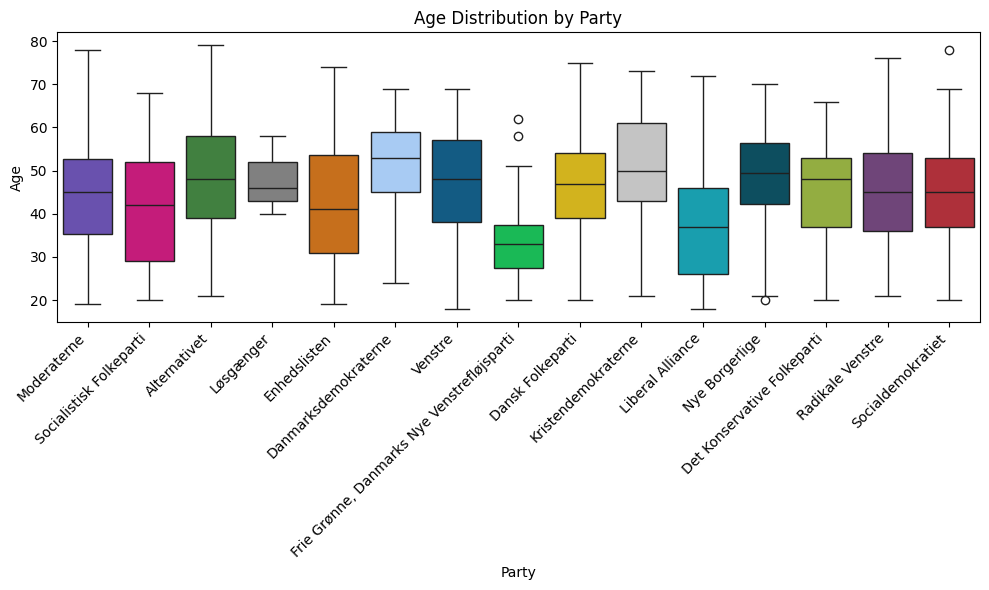

In [3]:
import seaborn as sns

plt.figure(figsize=(10, 6))
ax = sns.boxplot(
    x="parti",
    y="alder",
    palette=party_palette,
    data=data_filtered,
)
ax.set_xlabel("Party")
ax.set_ylabel("Age")
ax.set_title("Age Distribution by Party")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# The Most Confident Candidates

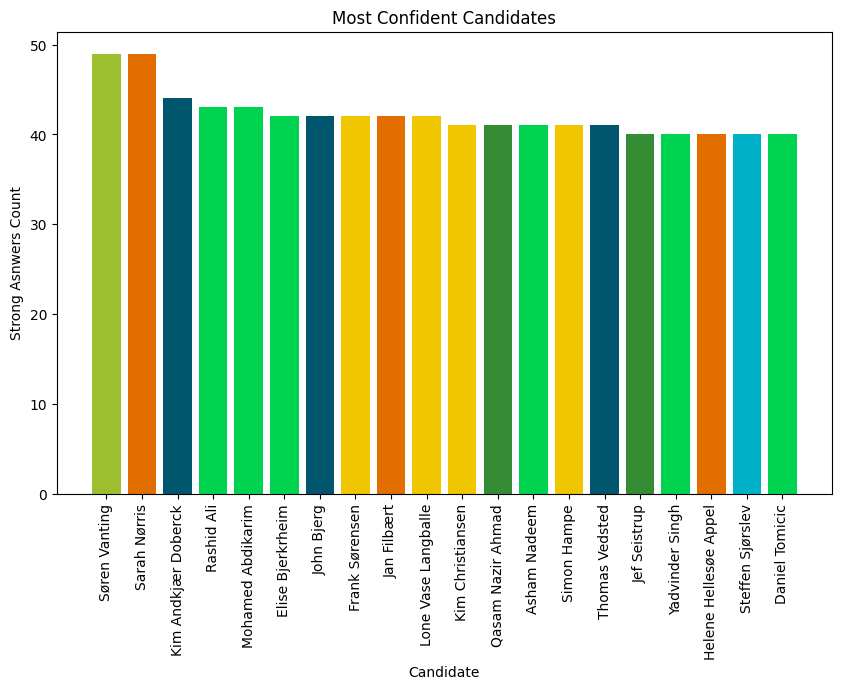

In [4]:
# dr = 530 - 563
# tv2 - 1a - 12b

dr = data_filtered.loc[:, "530":"563"]
tv2 = data_filtered.loc[:, "1a":"12b"]

question_data = pd.concat([dr, tv2], axis=1)

strong_answers_data = question_data.copy()

strong_answers_data["strong_answers_num"] = question_data.isin([-2, 2]).sum(axis=1)

strong_answers_data = pd.concat(
    [strong_answers_data, data_filtered["navn"], data_filtered["parti"]], axis=1
)

strong_answers_data = strong_answers_data.sort_values(
    "strong_answers_num", ascending=False
)

strong_answers_data = strong_answers_data.head(20)

plot_colors = strong_answers_data["parti"].map(party_palette)

plt.figure(figsize=(10, 6))
plt.bar(
    strong_answers_data["navn"],
    strong_answers_data["strong_answers_num"],
    color=plot_colors,
)

plt.title("Most Confident Candidates")
plt.xlabel("Candidate")
plt.ylabel("Strong Asnwers Count")
plt.xticks(rotation=90)
plt.show()

# Differences between parties

In [5]:
question_columns = question_data.columns.delete([-1, -2])

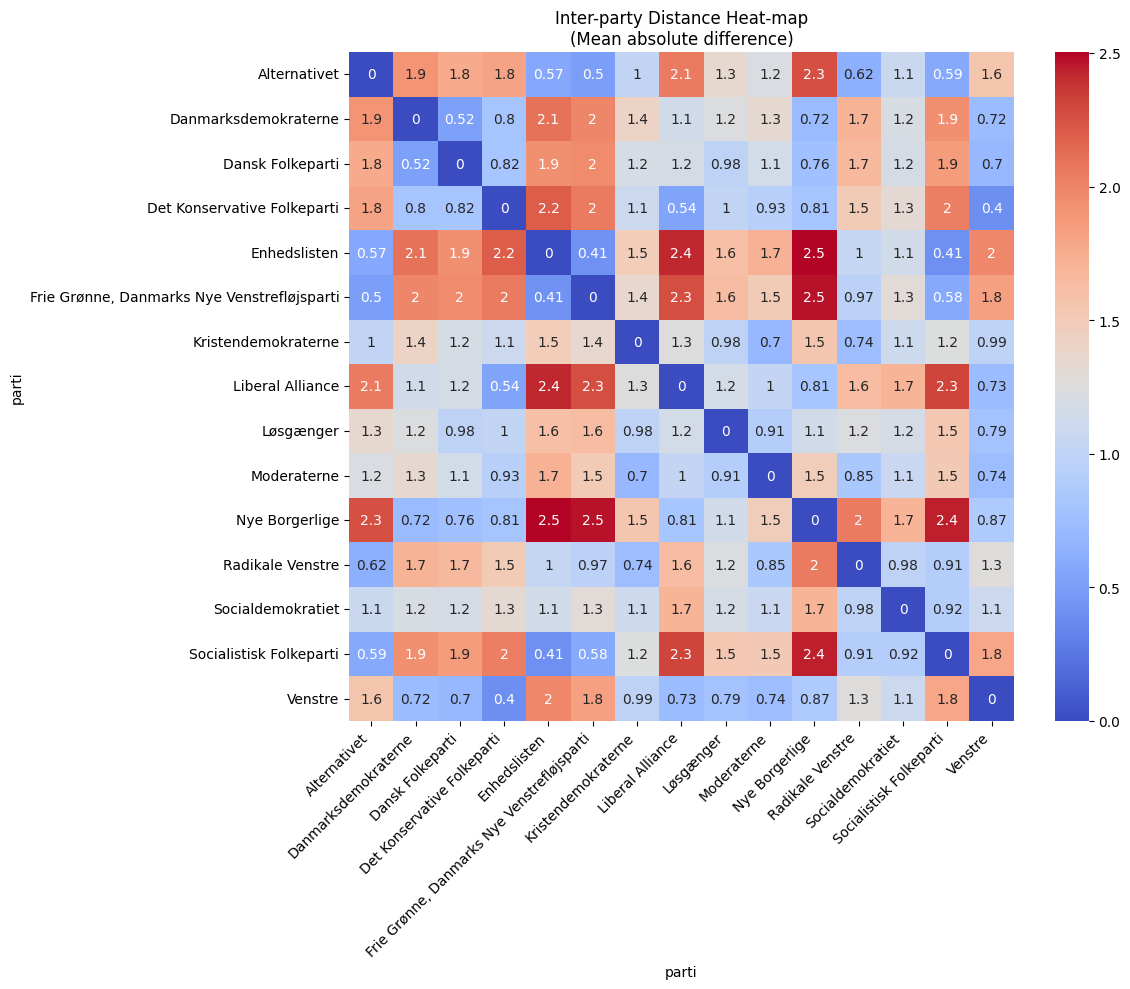

In [6]:
from scipy.spatial.distance import pdist, squareform

parties_mean = data_filtered.groupby("parti")[question_columns].mean()

dist_vec = pdist(parties_mean.values, metric="cityblock")
dist_matrix = pd.DataFrame(
    squareform(dist_vec) / parties_mean.shape[1],  # mean of differences
    index=parties_mean.index,
    columns=parties_mean.index,
)

plt.figure(figsize=(12, 10))
sns.heatmap(dist_matrix, annot=True, cmap="coolwarm")

plt.title("Inter-party Distance Heat-map\n(Mean absolute difference)")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Intra-party

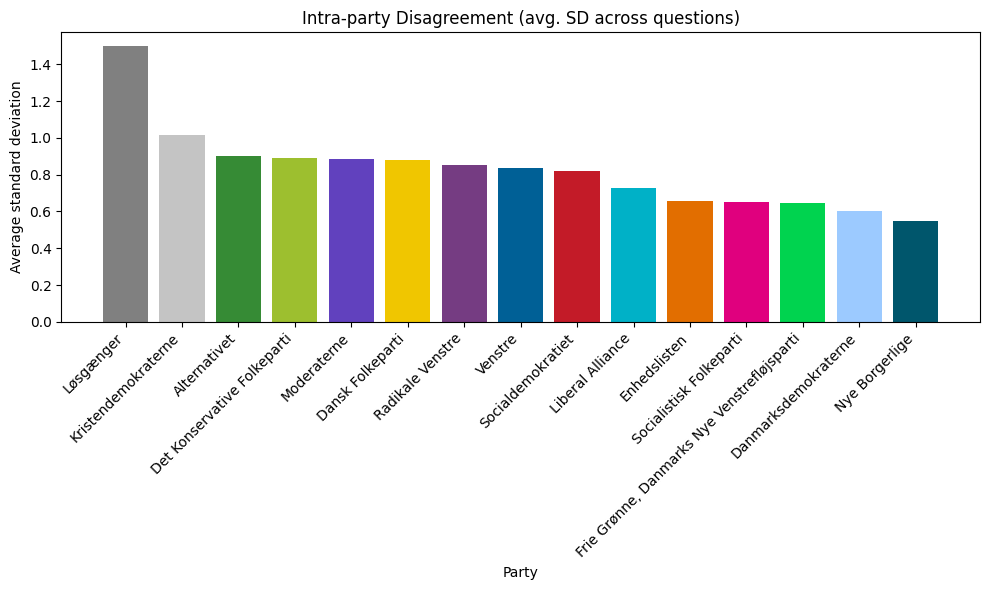

In [7]:
intra_party_std = data_filtered.groupby("parti")[question_columns].std()
intra_party_disagreement = intra_party_std.mean(axis=1).sort_values(ascending=False)

colors = [
    party_palette.get(party, "#666666") for party in intra_party_disagreement.index
]

plt.figure(figsize=(10, 6))
plt.bar(intra_party_disagreement.index, intra_party_disagreement.values, color=colors)

plt.title("Intra-party Disagreement (avg. SD across questions)")
plt.xlabel("Party")
plt.ylabel("Average standard deviation")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Classification Models

In [40]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

X = data_filtered.copy().drop(["parti", "navn", "storkreds", "alder"], axis=1)

y = data_filtered[["parti"]].copy()
y_label_encoder = LabelEncoder()
y["parti"] = y_label_encoder.fit_transform(y["parti"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y["parti"], stratify=y, test_size=0.2, random_state=42
)

In [41]:
import numpy as np


def plot_feature_importances(model):
    plt.figure(figsize=(20, 20))
    n_features = X_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align="center")
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

In [42]:
clf = DecisionTreeClassifier(
    max_depth=7, min_samples_leaf=10, min_samples_split=5, random_state=42
)
clf.fit(X_train, y_train)

print("Decision tree training accuracy:", clf.score(X_train, y_train))
print("Decision tree testing accuracy:", clf.score(X_test, y_test))

Decision tree training accuracy: 0.788235294117647
Decision tree testing accuracy: 0.7426900584795322


In [43]:
forest = RandomForestClassifier(
    n_estimators=100, max_depth=10, max_features=10, random_state=42
)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.924


In [44]:
gbt = GradientBoostingClassifier(
    random_state=5, n_estimators=1000, max_depth=3, learning_rate=0.3
)
gbt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.906


In [51]:
party_map = dict(enumerate(y_label_encoder.classes_))

def get_misclassified(model, X, y_true, model_name):
    y_pred = model.predict(X)
    probs = model.predict_proba(X).max(axis=1)
    df = pd.DataFrame({
        'navn': data_filtered['navn'],
        'actual': y_true,
        'predicted': [party_map[i] for i in y_pred],
        'prob': probs
    })
    df['wrong'] = df['actual'] != df['predicted']
    df = df[df['wrong']].sort_values('prob', ascending=False)
    df['model'] = model_name
    return df

mis_dt = get_misclassified(clf, X, data_filtered['parti'], 'DecisionTree')
mis_rf = get_misclassified(forest, X, data_filtered['parti'], 'RandomForest')
mis_gb = get_misclassified(gbt, X, data_filtered['parti'], 'GradientBoosting')

all_mis = pd.concat([mis_dt, mis_rf, mis_gb], ignore_index=True)
display(all_mis.head(10))

count = all_mis.groupby('navn')['model'].nunique().reset_index(name='n_wrong')
consensus_wrong = count[count['n_wrong']==3]['navn']
print("Mis‐classified by all 3 models:\n", consensus_wrong.tolist())

,navn,actual,predicted,prob,wrong,model
0,Clara Turms,Enhedslisten,Socialistisk Folkeparti,1.000000,True,DecisionTree
1,Tom Gillesberg,Løsgænger,Enhedslisten,1.000000,True,DecisionTree
2,Tage Sørensen,Kristendemokraterne,Dansk Folkeparti,1.000000,True,DecisionTree
3,Mette Reissmann,Socialdemokratiet,Radikale Venstre,0.900000,True,DecisionTree
4,Rasmus Henriksen,Socialistisk Folkeparti,Socialdemokratiet,0.900000,True,DecisionTree
5,Tina Mørk,Kristendemokraterne,Radikale Venstre,0.900000,True,DecisionTree
6,Theis Kylling Hommeltoft,Socialdemokratiet,Radikale Venstre,0.900000,True,DecisionTree
7,Josefine Schlosser,Radikale Venstre,Kristendemokraterne,0.866667,True,DecisionTree
8,Mads Silberg,Det Konservative Folkeparti,Kristendemokraterne,0.866667,True,DecisionTree
9,Morten Vehl,Danmarksdemokraterne,Venstre,0.860465,True,DecisionTree


Mis‐classified by all 3 models:
 ['Bo Sandberg', 'Kasper B. Mundt', 'Kenneth Skatka Hammer', 'Kurt Vind Christiansen', 'Phillip Sperling', 'Pia Offer Madsen', 'Tina Mørk', 'Tom Gillesberg']


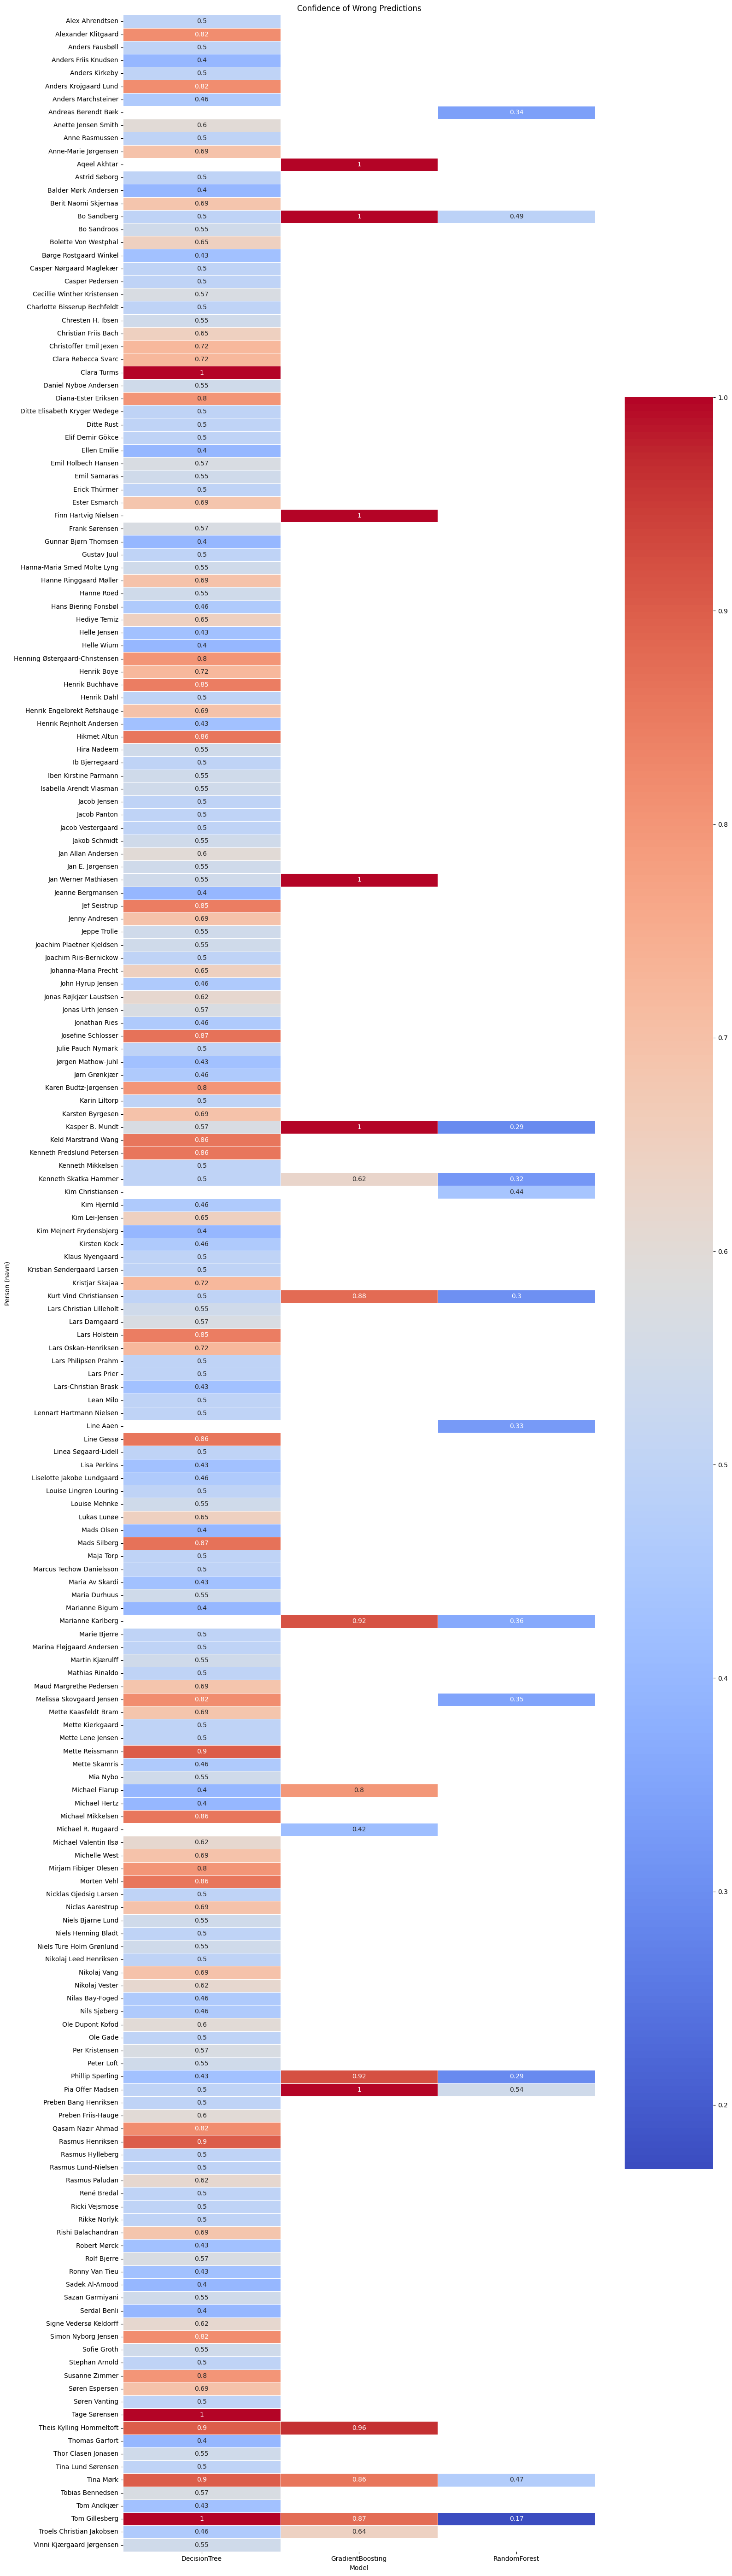

In [60]:
pivot = all_mis.pivot(index='navn', columns='model', values='prob')

plt.figure(figsize=(16, 56))
sns.heatmap(pivot, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Confidence of Wrong Predictions")
plt.ylabel('Person (navn)')
plt.xlabel('Model')
plt.tight_layout()
plt.show()